In [74]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [75]:
data_merge = pd.read_csv("Data_Merge_withTemp.csv")


In [76]:
data_merge.head()


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0_x,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,...,耳鼻喉医院,肿瘤医院,胸科医院,脑科医院,诊所,骨科医院,Unnamed: 0_y,Population,Land_Area_mi2,Temperature_03_12
0,0,0,0,35,四川省,Sichuan,51,凉山,Liangshan,NaN,...,55.0,53.0,12.0,13,11546,379,NaN,4680000,23266.960,271.80
1,1,1,1,104,新疆维吾尔自治区,Xinjiang,65,塔城,Tacheng,654201.0,...,4.0,5.0,5.0,5,2438,18,NaN,924000,40365.436,263.26
2,2,2,2,140,青海省,Qinghai,63,西宁,Xining,630100.0,...,7.0,7.0,2.0,3,1611,29,322.0,"1,539,000",2846.000,261.65
3,3,3,3,141,青海省,Qinghai,63,海北州,Haibei,632200.0,...,7.0,7.0,2.0,3,1611,29,NaN,284300,13278.000,255.14
4,4,4,4,142,西藏自治区,Xizang,54,拉萨,Lhasa,540100.0,...,NaN,NaN,NaN,3,369,2,NaN,902500,11303.000,263.28


In [77]:
cols = ["provinceName", "provinceEnglishName", "cityName", "cityEnglishName", "province_confirmedCount", "province_suspectedCount", "province_curedCount", "province_deadCount", "city_confirmedCount", "city_suspectedCount", "city_curedCount", "city_deadCount", "Population", "Land_Area_mi2"]
data_merge = pd.DataFrame(data_merge, columns = cols)
data_merge.head()


,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,Population,Land_Area_mi2
0,四川省,Sichuan,凉山,Liangshan,177,0,1,1,3,0,0,0,4680000,23266.960
1,新疆维吾尔自治区,Xinjiang,塔城,Tacheng,39,0,0,0,4,0,0,0,924000,40365.436
2,青海省,Qinghai,西宁,Xining,18,0,18,0,15,0,15,0,"1,539,000",2846.000
3,青海省,Qinghai,海北州,Haibei,18,0,18,0,3,0,3,0,284300,13278.000
4,西藏自治区,Xizang,拉萨,Lhasa,1,0,1,0,1,0,1,0,902500,11303.000


['Sichuan' 'Xinjiang' 'Qinghai' 'Xizang' 'Chongqing' 'Guizhou' 'Ningxia'
 'Liaoning' 'Tianjin' 'Hubei' 'Jiangxi' 'Beijing' 'Gansu' 'Anhui'
 'Heilongjiang' 'Shanghai' 'Yunnan' 'Shanxi' 'Neimenggu' 'Guangdong'
 'Jiangsu' 'Jilin' 'Hainan' 'Shaanxi' 'Hebei' 'Guangxi' 'Hunan' 'Fujian'
 'Henan' 'Shandong' 'Zhejiang']
31
           Sichuan  Xinjiang  Qinghai  Xizang  Chongqing  Guizhou  Ningxia  \
confirmed      177        39       18       1        575      146       72   
suspected        0         0        0       0          0        0        0   
cured            1         0       18       1        335      112       68   
dead             1         0        0       0          6        2        0   

           Liaoning  Tianjin  Hubei  ...  Jilin  Hainan  Shaanxi  Hebei  \
confirmed       121      136  65914  ...     93     168      245    318   
suspected         0        0      0  ...      0       0        0      0   
cured            93      102  26403  ...     73     133      199    

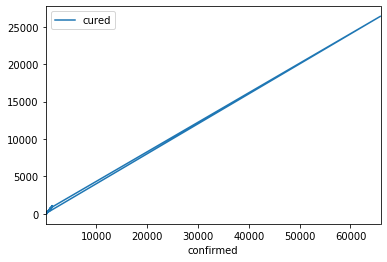

In [154]:
# count number of provinces
provinces = data_merge['provinceEnglishName'].unique()
print(provinces)
print(len(provinces))

def count_in_dictionary(data_merge, i, j):
    tmp_count = {}
    for entry in data_merge.itertuples(): 
        tmp_name = entry[i]
        confirmed_count = entry[j]
        # represents data inconsistency
        if tmp_name not in tmp_count:
            tmp_count[tmp_name] = confirmed_count
    return tmp_count

province_confirmed_count = count_in_dictionary(data_merge, 2, 5)
province_suspected_count = count_in_dictionary(data_merge, 2, 6)
province_cured_count = count_in_dictionary(data_merge, 2, 7)
province_dead_count = count_in_dictionary(data_merge, 2, 8)

province_confirmed_data = pd.DataFrame([province_confirmed_count])
province_cured_data = pd.DataFrame([province_cured_count])
province_dead_data = pd.DataFrame([province_dead_count])



province_data = pd.DataFrame([province_confirmed_count, province_suspected_count, province_cured_count, province_dead_count])
province_data = province_data.rename(index={0: 'confirmed', 1:'suspected', 2: 'cured', 3: 'dead'})
print(province_data)
province_data_transposed = province_data.T
# province_data_transposed.plot(kind='bar',x='confirmed',y='cured')
ax = plt.gca()

province_data_transposed.plot(kind='line',x='confirmed',y='cured',ax=ax)
# df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

# print(province_data_transposed)
# province_data.plot.scatter(x=0, y = 2)
# province_data_transposed.plot.scatter(x='confirmed', y = 'cured')

In [159]:
import seaborn as sns

# normalization
province_confirmed_copy = province_confirmed_data.copy()
print(province_confirmed_copy)
cnt = 0

print("Provinces dropped:")
for data in province_confirmed_copy.iloc[0]:
    cnt += 1
#     print(cnt)
#     print(province_confirmed_copy[cnt])
    if data <= 100:
        print(provinces[cnt])
        province_confirmed_copy = province_confirmed_copy.drop(columns = provinces[cnt])
province_data = province_data.rename(index={0: 'confirmed', 1:'suspected', 2: 'cured', 3: 'dead'})

print(province_confirmed_copy)


        # In [38]: sns.barplot(y=subset.index, x=subset.values)

   Sichuan  Xinjiang  Qinghai  Xizang  Chongqing  Guizhou  Ningxia  Liaoning  \
0      177        39       18       1        575      146       72       121   

   Tianjin  Hubei  ...  Jilin  Hainan  Shaanxi  Hebei  Guangxi  Hunan  Fujian  \
0      136  65914  ...     93     168      245    318      252   1017     296   

   Henan  Shandong  Zhejiang  
0   1272       756      1205  

[1 rows x 31 columns]
Provinces dropped:
Qinghai
Xizang
Chongqing
Liaoning
Anhui
Guangdong
Hainan
   Sichuan  Xinjiang  Guizhou  Ningxia  Tianjin  Hubei  Jiangxi  Beijing  \
0      177        39      146       72      136  65914      935      410   

   Gansu  Heilongjiang  ...  Jiangsu  Jilin  Shaanxi  Hebei  Guangxi  Hunan  \
0     91           480  ...      631     93      245    318      252   1017   

   Fujian  Henan  Shandong  Zhejiang  
0     296   1272       756      1205  

[1 rows x 24 columns]


In [112]:
# normalizing using seaborn library
normalized_province_data = preprocessing.normalize(province_data)
print(normalized_province_data)

[[2.68220387e-03 5.90994074e-04 2.72766495e-04 1.51536942e-05
  8.71337416e-03 2.21243935e-03 1.09106598e-03 1.83359700e-03
  2.06090241e-03 9.98840599e-01 1.41687041e-02 6.21301462e-03
  1.37898617e-03 1.50021573e-02 7.27377321e-03 5.10679494e-03
  2.63674279e-03 2.01544133e-03 1.13652706e-03 2.04271798e-02
  9.56198104e-03 1.40929356e-03 2.54582062e-03 3.71265508e-03
  4.81887475e-03 3.81873094e-03 1.54113070e-02 4.48549348e-03
  1.92754990e-02 1.14561928e-02 1.82602015e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.77093690e-05 0.00000000e+00 6.78

{'Sichuan': 177, 'Xinjiang': 39, 'Qinghai': 18, 'Xizang': 1, 'Chongqing': 575, 'Guizhou': 146, 'Ningxia': 72, 'Liaoning': 121, 'Tianjin': 136, 'Hubei': 65914, 'Jiangxi': 935, 'Beijing': 410, 'Gansu': 91, 'Anhui': 990, 'Heilongjiang': 480, 'Shanghai': 337, 'Yunnan': 174, 'Shanxi': 133, 'Neimenggu': 75, 'Guangdong': 1348, 'Jiangsu': 631, 'Jilin': 93, 'Hainan': 168, 'Shaanxi': 245, 'Hebei': 318, 'Guangxi': 252, 'Hunan': 1017, 'Fujian': 296, 'Henan': 1272, 'Shandong': 756, 'Zhejiang': 1205}


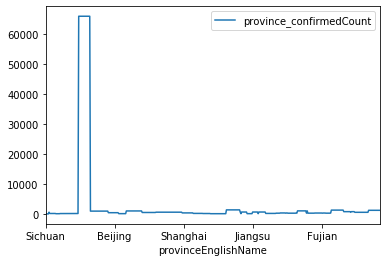

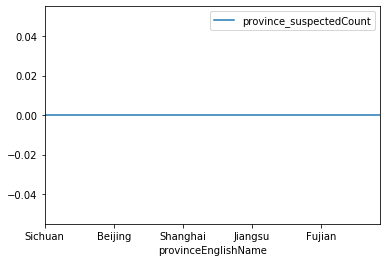

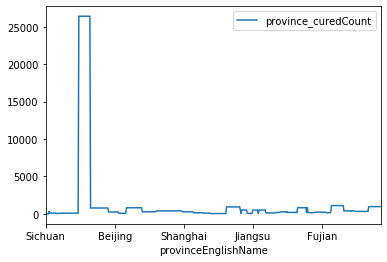

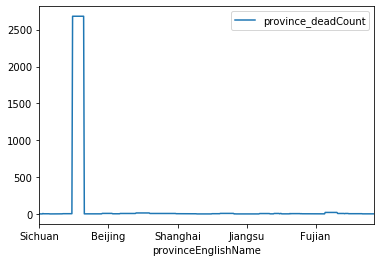

,Liangshan,Tacheng,Xining,Haibei,Lhasa,Youyang Tujia and Miao Autonomous County,Qianxinan,Anshun,Qiandongnan,Tongren,...,Ningbo,Hangzhou,Jiaxing,Zhoushan,Jinhua,Quzhou,Huzhou,Lishui,Shaoxing,Wenzhou
confirmed,0.75,0.75,0.5,0.5,0.5,0.75,0.5,0.5,0.5,0.5,...,0.530255,0.526627,0.561111,0.575,0.522727,0.553571,0.525,0.5,0.535714,0.548611
suspected,-0.25,-0.25,-0.5,-0.5,-0.5,-0.25,-0.5,-0.5,-0.5,-0.5,...,-0.469745,-0.473373,-0.438889,-0.425,-0.477273,-0.446429,-0.475,-0.5,-0.464286,-0.451389
cured,-0.25,-0.25,0.5,0.5,0.5,-0.25,0.5,0.5,0.5,0.5,...,0.409236,0.420118,0.316667,0.275,0.431818,0.339286,0.425,0.5,0.392857,0.352183
dead,-0.25,-0.25,-0.5,-0.5,-0.5,-0.25,-0.5,-0.5,-0.5,-0.5,...,-0.469745,-0.473373,-0.438889,-0.425,-0.477273,-0.446429,-0.475,-0.5,-0.464286,-0.449405


In [161]:
city_confirmed_count = count_in_dictionary(data_merge, 4, 9)
city_suspected_count = count_in_dictionary(data_merge, 4, 10)
city_cured_count = count_in_dictionary(data_merge, 4, 11)
city_dead_count = count_in_dictionary(data_merge, 4, 12)

print(province_confirmed_count)
data_merge.plot(x='provinceEnglishName',y='province_confirmedCount')
plt.show()
data_merge.plot(x='provinceEnglishName',y='province_suspectedCount')
plt.show()
data_merge.plot(x='provinceEnglishName',y='province_curedCount')
plt.show()
data_merge.plot(x='provinceEnglishName',y='province_deadCount')
plt.show()
print()

# another way of calculation using formula
city_data = pd.DataFrame([city_confirmed_count, city_suspected_count, city_cured_count, city_dead_count])
city_data = city_data.rename(index={0: 'confirmed', 1:'suspected', 2: 'cured', 3: 'dead'})
city_norm = (city_data - city_data.mean()) / (city_data.max() - city_data.min())
city_norm

# flights = city_data.pivot("month", "year", "passengers")
# print()
# print(province_suspected_count)
# print()
# print(province_cured_count)
# print()
# print(province_dead_count)
# print()
# print()

# print(city_confirmed_count)
# # data_merge.plot(x='provinceName', y=province_confirmed_count )
# print()
# print(city_suspected_count)
# print()
# print(city_cured_count)
# print()
# print(city_dead_count)

In [167]:
# feature scaling on city_data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
city_data_scaled = scaler.fit_transform(city_data)
print(city_data_scaled)
print('means (confirmed, suspected, cured and dead): ', city_data_scaled.mean(axis=0))
print('std (confirmed, suspected, cured and dead): ', city_data_scaled.std(axis=0))
print('Min (confirmed, suspected, cured and dead): ', city_data_scaled.min(axis=0))
print('Max (confirmed, suspected, cured and dead): ', city_data_scaled.max(axis=0))

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 
city_data_scaled = scaler.fit_transform(city_data)
print(city_data_scaled)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 1.         0.85714286 0.80357143]
 [0.         0.         0.         ... 0.         0.         0.00198413]]
means (confirmed, suspected, cured and dead):  [0.25       0.25       0.5        0.5        0.5        0.25
 0.5        0.5        0.5        0.5        0.475      0.47058824
 0.44444444 0.3984375  0.41304348 0.48214286 0.49242424 0.4375
 0.5        0.5        0.5        0.47916667 0.46428571 0.5
 0.5        0.5        0.5        0.42857143 0.3125     0.5
 0.39583333 0.375      0.45535714 0.40789474 0.5        0.5
 0.375      0.45833333 0.375      0.3125     0.45       0.33333333
 0.42083333 0.45833333 0.5        0.5        0.5        0.5
 0.44587321 0.39716841 0.41929911 0.40449134 0.41702128 0.38102952
 0.39881408 0.40183661 0.43551997 0.38569804 0.34326506 0.37352309
 0.42695652 0.38636364 0.423

In [179]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

city_data_new = city_data.T
features = ['confirmed', 'suspected', 'cured', 'dead']
x = city_data_new.loc[:, features].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()
# print(city_data_new)


,confirmed,suspected,cured,dead
0,-0.078829,0.0,-0.109307,-0.064265
1,-0.078411,0.0,-0.109307,-0.064265
2,-0.073815,0.0,-0.090509,-0.064265
3,-0.078829,0.0,-0.105547,-0.064265
4,-0.079665,0.0,-0.108054,-0.064265


In [186]:
# Projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)
pca.explained_variance_ratio_ # confirmed as first component

     principal component 1  principal component 2
0              -206.624553             -23.375248
1              -205.676368             -23.687768
2              -190.522090             -12.901353
3              -205.679704             -20.530424
4              -208.205973             -21.801935
..                     ...                    ...
403            -192.730074             -16.381934
404            -197.152712             -17.028408
405            -187.995821             -11.629842
406            -158.307157              -1.425594
407             396.012508             204.048316

[408 rows x 2 columns]


array([9.99140719e-01, 8.58305147e-04])

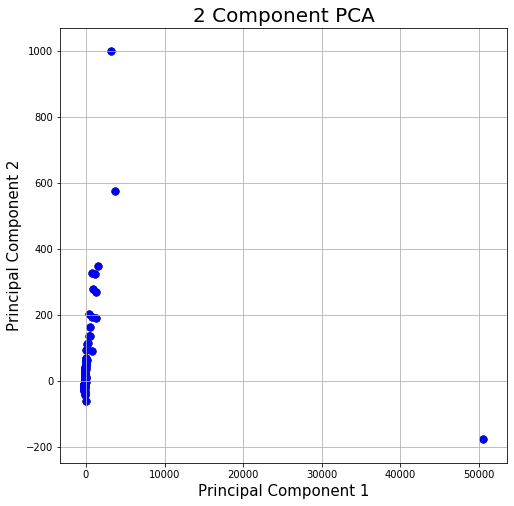

In [204]:
# Visualize 2D projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['confirmed', 'cured', 'dead']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    ax.scatter(principalDf.loc[np.arange(408), 'principal component 1']
               , principalDf.loc[np.arange(408), 'principal component 2']
               , c = color
               , s = 50)
# ax.legend(targets)
ax.grid()


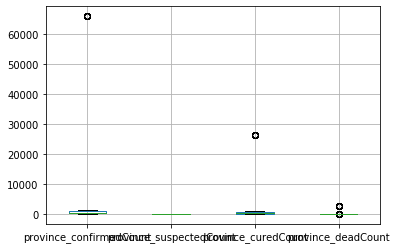

In [59]:
province_cols = ["provinceEnglishName", "province_confirmedCount", "province_suspectedCount", "province_curedCount", "province_deadCount"]
df2 = pd.DataFrame(data_merge, columns = province_cols)
plt.figure()
bp = df2.boxplot()

In [61]:
len(df2['provinceEnglishName'])

486